<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Multi_Linear_Regression_Toyota_Corola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

In [8]:
cars_df = pd.read_csv('ToyotaCorolla.csv', index_col = 0,encoding="ISO-8859-1")
cars_df.head()



,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [9]:
cars_df.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [10]:
cars = cars_df.copy(deep = True)   #true is default and false is for shallow copy
cars.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [11]:
cars.memory_usage().head()

Index        11488
Model        11488
Price        11488
Age_08_04    11488
Mfg_Month    11488
dtype: int64

In [12]:
cars.loc[:,['Fuel_Type','Price']].head(3)  #Access a group of rows and columns by label(s).

,Fuel_Type,Price
Id,,
1,Diesel,13500
2,Diesel,13750
3,Diesel,13950


In [13]:
cars.dtypes.value_counts()

int64     34
object     3
dtype: int64

In [14]:
#cars_cpy.select_dtypes(include = None, exclude = None).head(2) #default
cars.select_dtypes(exclude = [object]).head(3)  

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
2,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
3,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [15]:
cars.info()  #entries are 1436, row labels are 1 to 1442

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [16]:
print(np.unique(cars['Doors']))
print(np.unique(cars['cc']))
print(np.unique(cars['Automatic']))

[2 3 4 5]
[ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]
[0 1]


In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [18]:
cars['Met_Color'] = cars['Met_Color'].astype('object')
cars['Automatic'] = cars['Automatic'].astype('object')

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   object
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   object
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [20]:
cars.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [21]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
cars.drop(columns_to_drop, axis = 1, inplace= True)
cars.sample(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Weight
Id,,,,,,,,,,,
16,22000,28,18739,Petrol,192,0,Grey,0,1800,3,1185
221,12950,38,74319,Petrol,110,1,Black,0,1600,5,1075
1234,7250,78,84000,Petrol,110,1,Red,0,1600,5,1065
1218,8250,80,87000,Petrol,86,1,Black,0,1300,3,1015
270,14750,40,48952,Diesel,90,1,Blue,0,2000,5,1205


In [22]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [23]:
cars.rename(columns = {'Age_08_04':'Age_Months', 'cc':'CC'}, inplace = True)
cars.sample(2)

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Weight
Id,,,,,,,,,,,
296,13950,42,42560,Petrol,110,1,Silver,0,1600,5,1080
972,9950,61,49000,Petrol,110,0,Red,0,1600,3,1050


In [24]:
cars.insert(10, "Price_Class", " ")

In [25]:
for i in range(0, len(cars['Price']), 1):
    if cars['Price'].iloc[i] <= 8450:
        cars["Price_Class"].iloc[i] = 'Cheap'
    elif cars['Price'].iloc[i] >= 11950:
         cars["Price_Class"].iloc[i] = 'Expensive'
    else:
        cars['Price_Class'].iloc[i] = 'Average'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [26]:
cars.insert(11, "Age", " ")

In [27]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_Months,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [28]:
i = 0
while i < len(cars['Age_Months']):
    if cars['Age_Months'].iloc[i] <= 44:
        cars['Age'].iloc[i] = 'New Model'
        
    elif cars['Age_Months'].iloc[i] >= 70:
        cars['Age'].iloc[i] = 'Very Old'
               
    else:
        cars['Age'].iloc[i] = 'Old'
    i+=1          

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
cars['Age'].value_counts()

Old          689
New Model    378
Very Old     369
Name: Age, dtype: int64

In [30]:
cars['Price_Class'].value_counts()

Average      704
Cheap        369
Expensive    363
Name: Price_Class, dtype: int64

In [31]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Price_Class,Age,Weight
Id,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,1165
2,13750,23,72937,Diesel,90,1,Silver,0,2000,3,Expensive,New Model,1165
3,13950,24,41711,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,1165
4,14950,26,48000,Diesel,90,0,Black,0,2000,3,Expensive,New Model,1165
5,13750,30,38500,Diesel,90,0,Black,0,2000,3,Expensive,New Model,1170


In [32]:
cars.insert(12, "Age-Year",0)

In [33]:
cars.insert(12, 'KM/Month', 0)

In [34]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Price_Class,Age,KM/Month,Age-Year,Weight
Id,,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,0,0,1165
2,13750,23,72937,Diesel,90,1,Silver,0,2000,3,Expensive,New Model,0,0,1165
3,13950,24,41711,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,0,0,1165
4,14950,26,48000,Diesel,90,0,Black,0,2000,3,Expensive,New Model,0,0,1165
5,13750,30,38500,Diesel,90,0,Black,0,2000,3,Expensive,New Model,0,0,1170


In [35]:
def conversion(val1, val2):
    val_con = val1/12
    ratio   = val2/val1
    return [val_con, ratio]

In [36]:
cars['Age-Year'], cars['KM/Month'] = conversion(cars['Age_Months'], cars['KM'])

In [38]:
cars.sample(5)

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Price_Class,Age,KM/Month,Age-Year,Weight
Id,,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,2042.869565,1.916667,1165
1375,9750,70,57829,Petrol,110,0,Grey,0,1600,3,Average,Very Old,826.128571,5.833333,1050
191,7750,43,178858,CNG,110,0,White,0,1600,3,Cheap,New Model,4159.488372,3.583333,1084
361,12750,43,24553,Petrol,110,1,Green,0,1600,5,Expensive,New Model,571.000000,3.583333,1080
650,7250,65,117609,Petrol,86,0,Silver,0,1300,3,Cheap,Old,1809.369231,5.416667,1015


In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1436 non-null   int64  
 1   Age_Months   1436 non-null   int64  
 2   KM           1436 non-null   int64  
 3   Fuel_Type    1436 non-null   object 
 4   HP           1436 non-null   int64  
 5   Met_Color    1436 non-null   object 
 6   Color        1436 non-null   object 
 7   Automatic    1436 non-null   object 
 8   CC           1436 non-null   int64  
 9   Doors        1436 non-null   int64  
 10  Price_Class  1436 non-null   object 
 11  Age          1436 non-null   object 
 12  KM/Month     1436 non-null   float64
 13  Age-Year     1436 non-null   float64
 14  Weight       1436 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 179.5+ KB


In [40]:
pd.crosstab(index = cars['Fuel_Type'], columns = 'count', dropna = True)

col_0,count
Fuel_Type,
CNG,17
Diesel,155
Petrol,1264


In [41]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], dropna = True)  #two-way table

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,16,155,1185
1,1,0,79


In [42]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], normalize = True, dropna = True)  #two-way table, joint-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011142,0.107939,0.825209
1,0.000696,0.000000,0.055014


In [43]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = True, dropna = True) #two-way table, marginal probability

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011142,0.107939,0.825209,0.94429
1,0.000696,0.000000,0.055014,0.05571
All,0.011838,0.107939,0.880223,1.00000


In [44]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'index', dropna = True) #two-way-conditional-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011799,0.114307,0.873894
1,0.012500,0.000000,0.987500
All,0.011838,0.107939,0.880223


In [45]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.941176,1.0,0.9375,0.94429
1,0.058824,0.0,0.0625,0.05571


In [46]:
numerical_data = cars.select_dtypes(exclude = [object])
print(numerical_data.shape)

(1436, 9)


In [47]:
corr_matrix = numerical_data.corr()
corr_matrix

,Price,Age_Months,KM,HP,CC,Doors,KM/Month,Age-Year,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,-0.023369,-0.876590,0.581198
Age_Months,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.125711,1.000000,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.724024,0.505672,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,-0.260631,-0.156622,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.175403,-0.098084,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,0.049075,-0.148359,0.302618
KM/Month,-0.023369,-0.125711,0.724024,-0.260631,0.175403,0.049075,1.000000,-0.125711,0.324752
Age-Year,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.125711,1.000000,-0.470253
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.324752,-0.470253,1.000000


In [48]:
import matplotlib.pyplot as plt

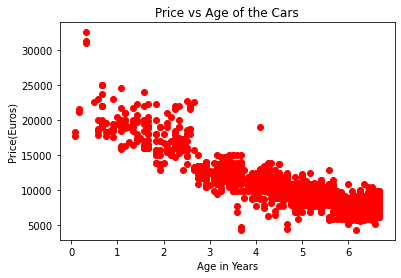

In [49]:
plt.scatter(cars['Age-Year'], cars['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

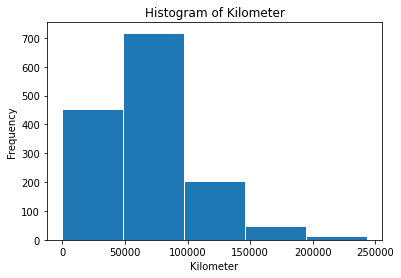

In [50]:
plt.hist(cars['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

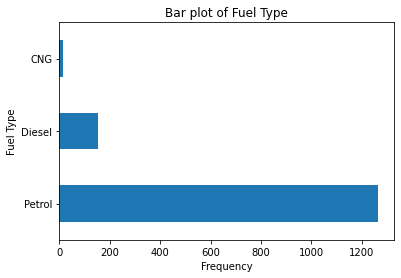

In [51]:
fuel_count = pd.value_counts(cars['Fuel_Type'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.title('Bar plot of Fuel Type')
fuel_count.plot.barh()

In [52]:
import seaborn as sns

In [53]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Price_Class,Age,KM/Month,Age-Year,Weight
Id,,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,2042.869565,1.916667,1165
2,13750,23,72937,Diesel,90,1,Silver,0,2000,3,Expensive,New Model,3171.173913,1.916667,1165
3,13950,24,41711,Diesel,90,1,Blue,0,2000,3,Expensive,New Model,1737.958333,2.000000,1165
4,14950,26,48000,Diesel,90,0,Black,0,2000,3,Expensive,New Model,1846.153846,2.166667,1165
5,13750,30,38500,Diesel,90,0,Black,0,2000,3,Expensive,New Model,1283.333333,2.500000,1170


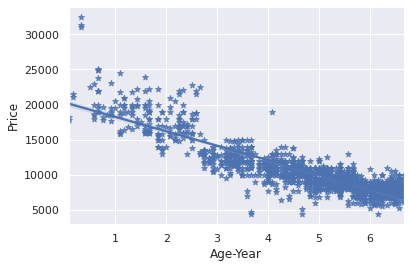

In [54]:
sns.set(style = 'darkgrid')
sns.regplot(x = cars['Age-Year'], y = cars['Price'], marker = '*')

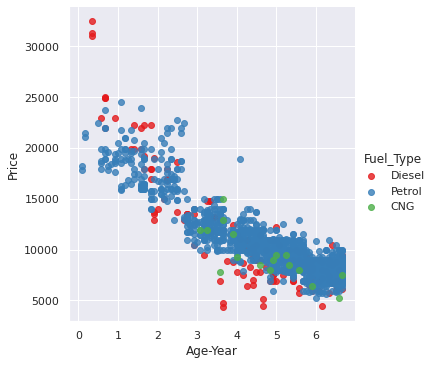

In [55]:
sns.lmplot(x = 'Age-Year', y = 'Price', data = cars, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


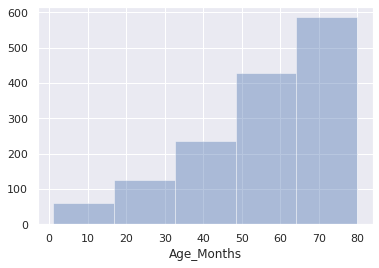

In [56]:
sns.distplot(cars['Age_Months'], kde = False, bins = 5)

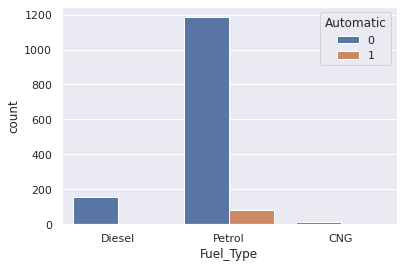

In [57]:
sns.countplot(x = 'Fuel_Type', data = cars, hue = 'Automatic')

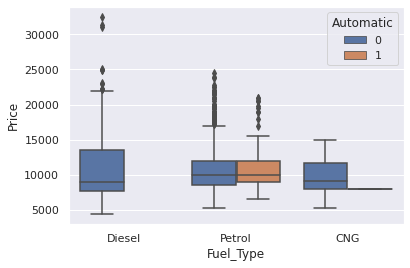

In [58]:
sns.boxplot(y = cars['Price'], x = cars['Fuel_Type'], hue = cars['Automatic'])

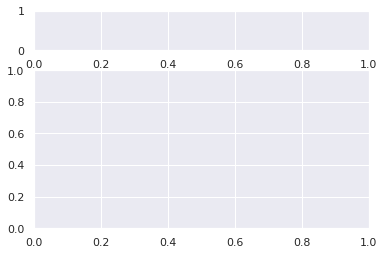

In [59]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


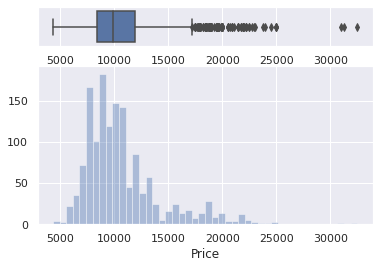

In [60]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(cars['Price'], ax = ax_box)
sns.distplot(cars['Price'], ax = ax_hist, kde = False)

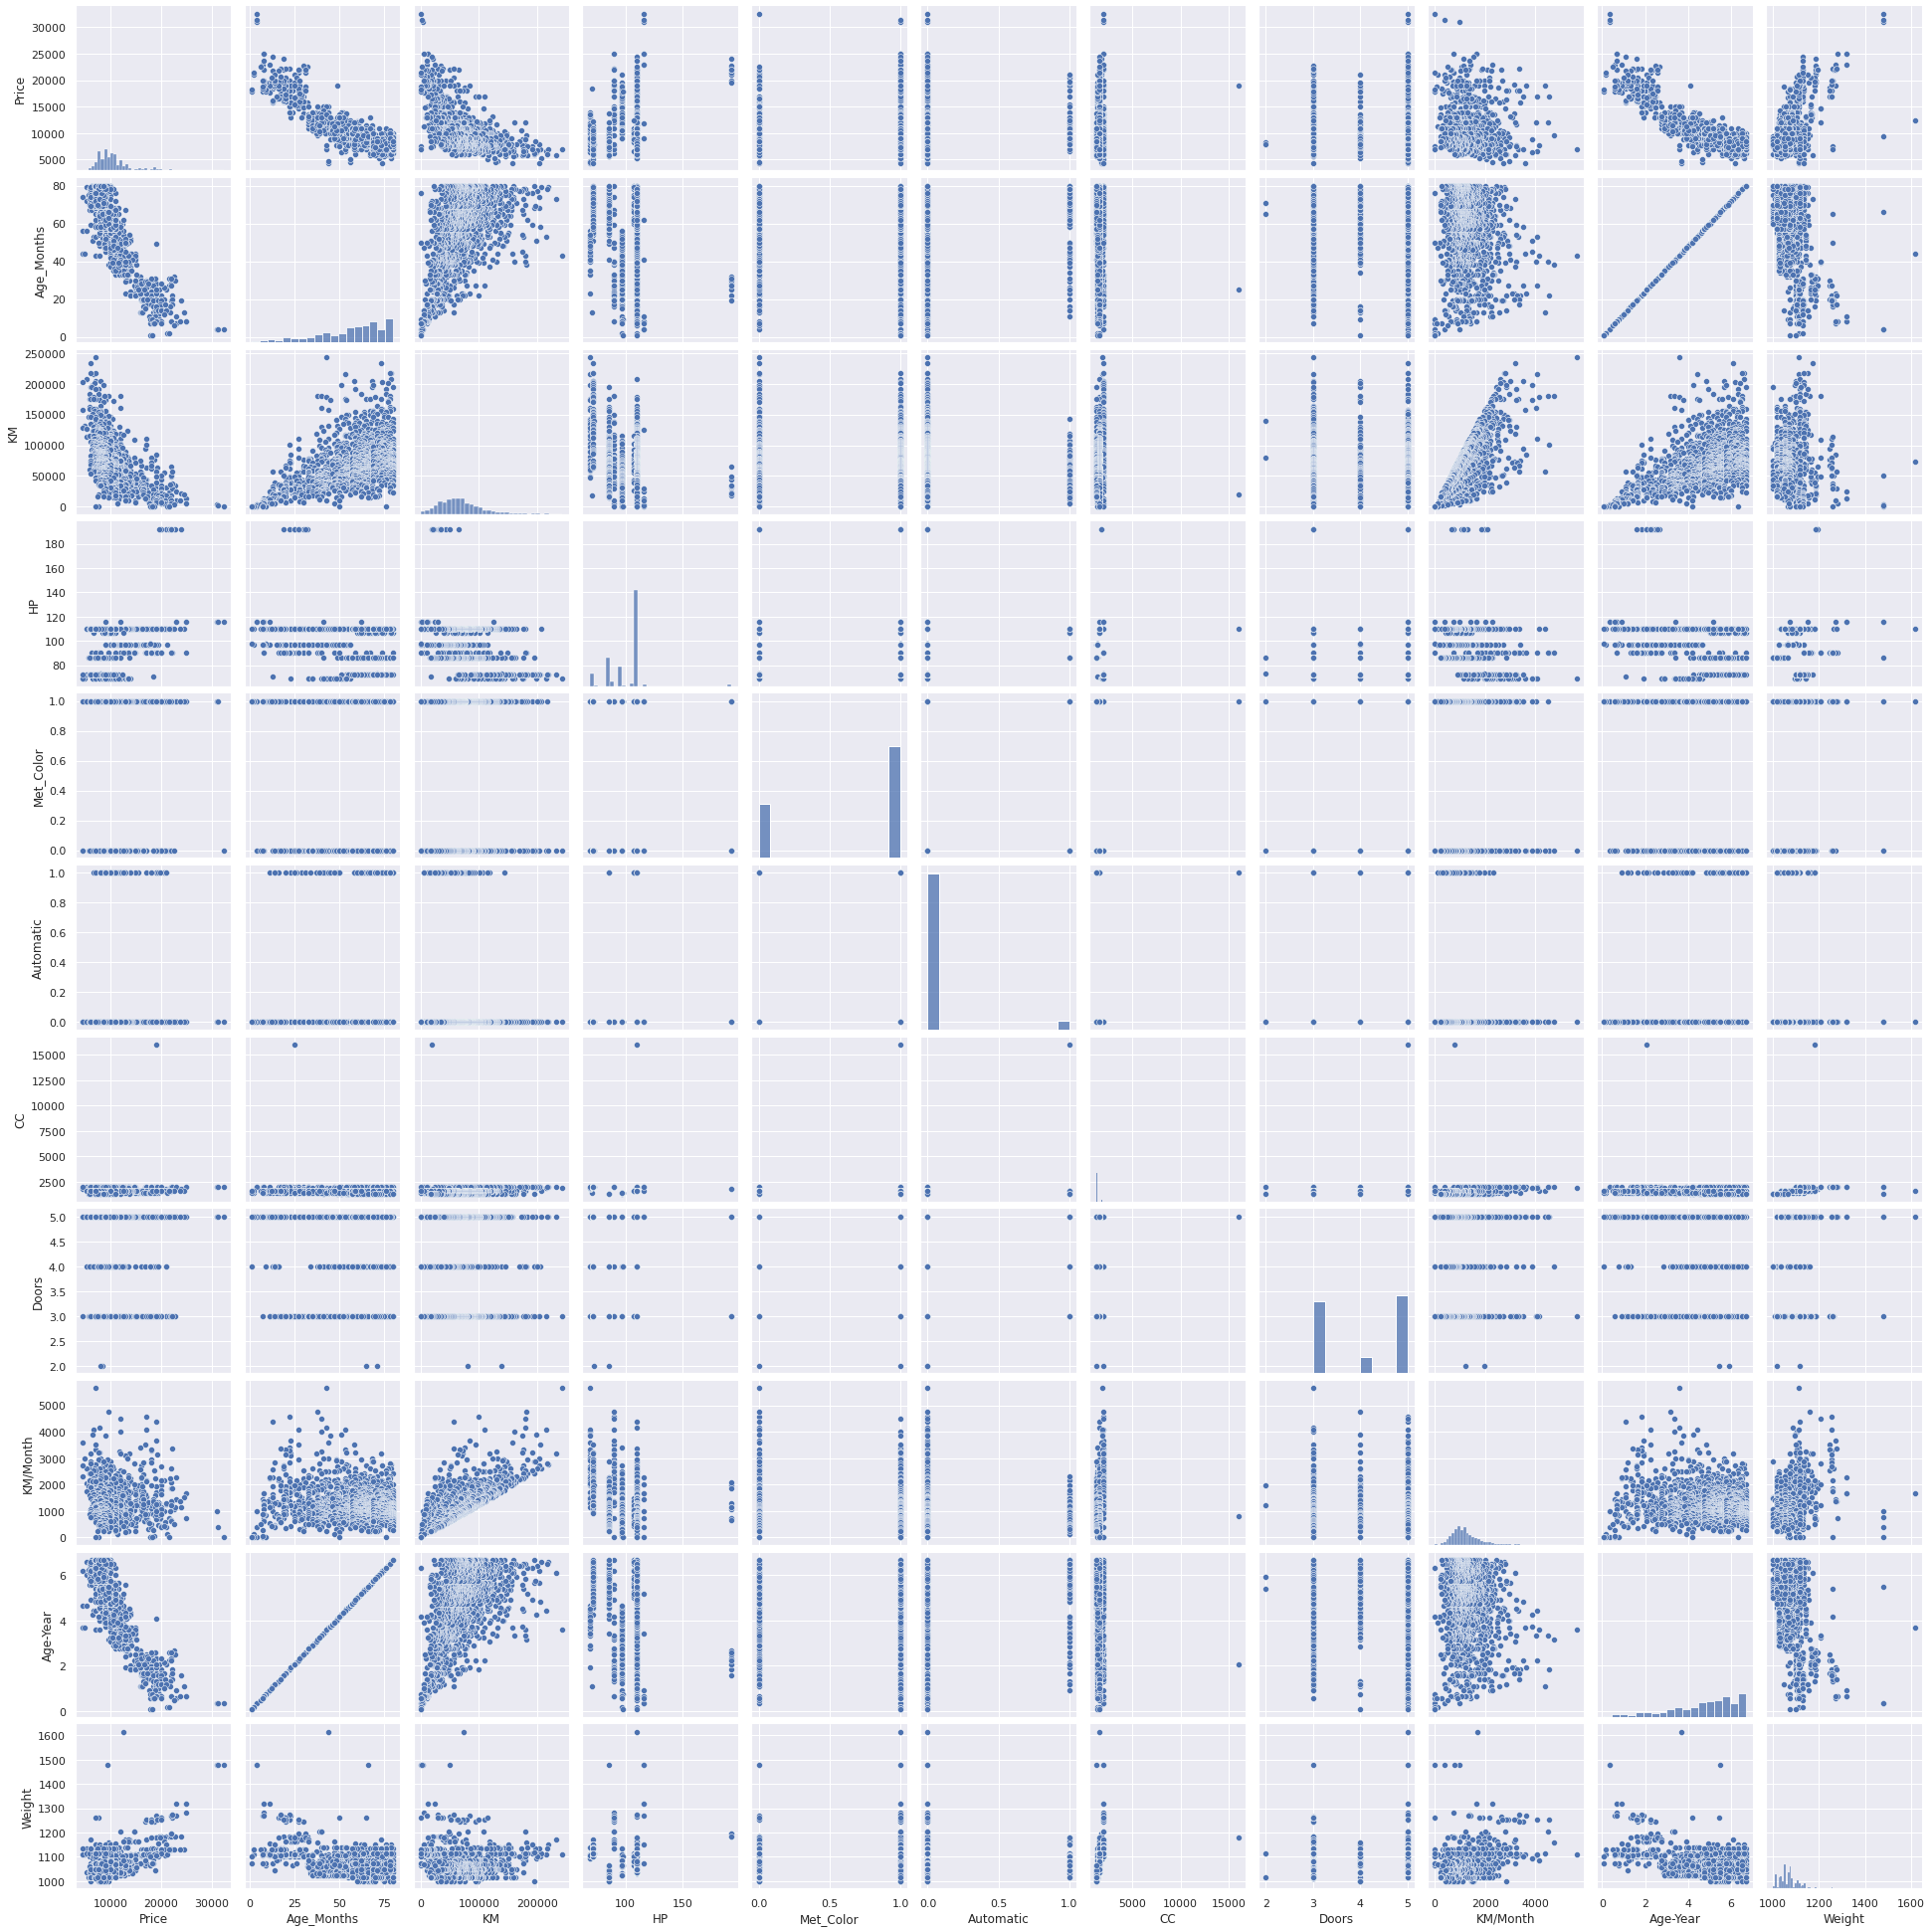

In [61]:
sns.pairplot(cars, kind = 'scatter')